In [1]:
# Sneha Dubey & Bastiaan Van Buiten
# Dr. Ghosh
# CSCI 183
# 27 February 2024
# Homework 3

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
df = pd.read_csv("heart.csv")
print(df.isna().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# 1. Create and compile as many plots as you can using the matplotlib library for the given dataset.

In [6]:
df_positive = df[df['target'] == 1]
df_negative = df[df['target'] == 0]

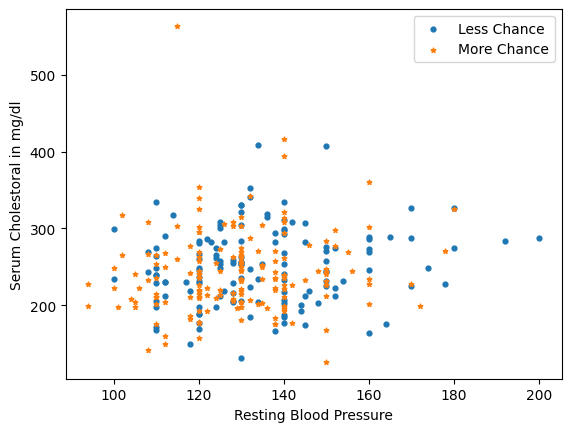

In [7]:
plt.scatter(df_negative.trestbps , df_negative.chol, label="Less Chance" , s = 12, marker='o')
plt.scatter(df_positive.trestbps , df_positive.chol, label="More Chance" , s = 12, marker='*')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Serum Cholestoral in mg/dl')
plt.legend()
plt.show()

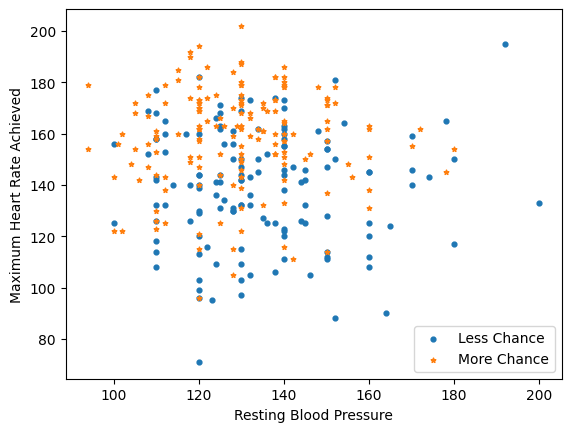

In [8]:
plt.scatter(df_negative.trestbps , df_negative.thalach, label="Less Chance" , s = 12, marker='o')
plt.scatter(df_positive.trestbps , df_positive.thalach, label="More Chance" , s = 12, marker='*')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Maximum Heart Rate Achieved')
plt.legend()
plt.show()

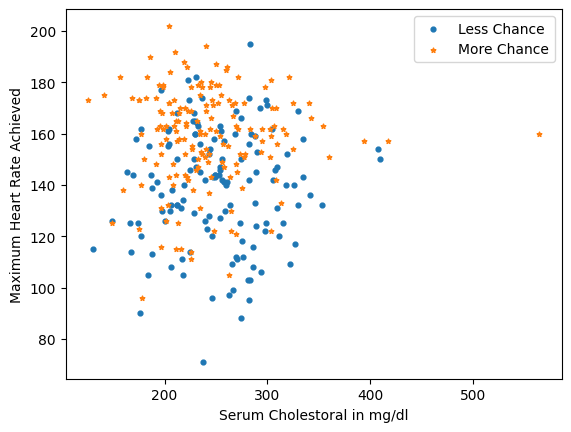

In [9]:
plt.scatter(df_negative.chol , df_negative.thalach, label="Less Chance" , s = 12, marker='o')
plt.scatter(df_positive.chol , df_positive.thalach, label="More Chance" , s = 12, marker='*')
plt.xlabel('Serum Cholestoral in mg/dl')
plt.ylabel('Maximum Heart Rate Achieved') 
plt.legend()
plt.show()

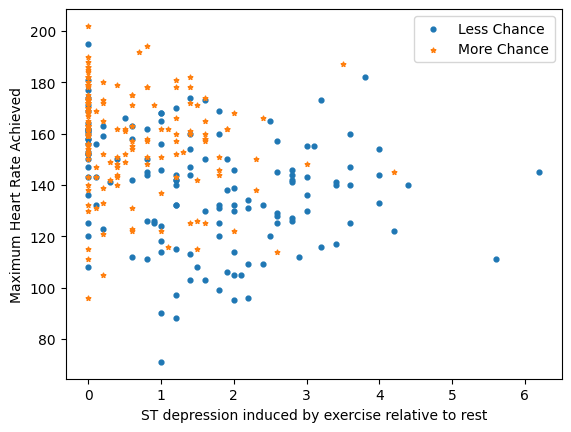

In [10]:
plt.scatter(df_negative.oldpeak , df_negative.thalach, label="Less Chance" , s = 12, marker='o')
plt.scatter(df_positive.oldpeak , df_positive.thalach, label="More Chance" , s = 12, marker='*')
plt.xlabel('ST depression induced by exercise relative to rest')
plt.ylabel('Maximum Heart Rate Achieved')
plt.legend()
plt.show()

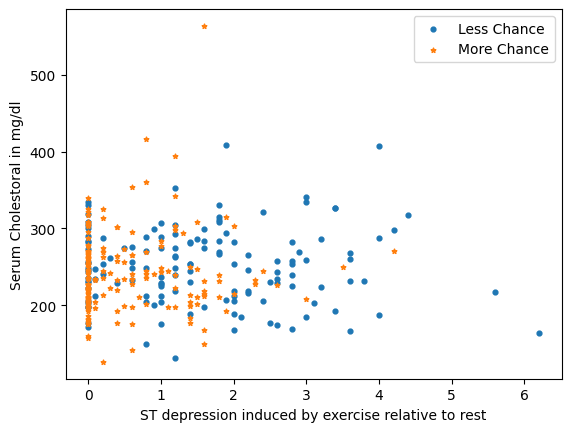

In [11]:
plt.scatter(df_negative.oldpeak , df_negative.chol, label="Less Chance" , s = 12, marker='o')
plt.scatter(df_positive.oldpeak , df_positive.chol, label="More Chance" , s = 12, marker='*')
plt.xlabel('ST depression induced by exercise relative to rest')
plt.ylabel('Serum Cholestoral in mg/dl')
plt.legend()
plt.show()

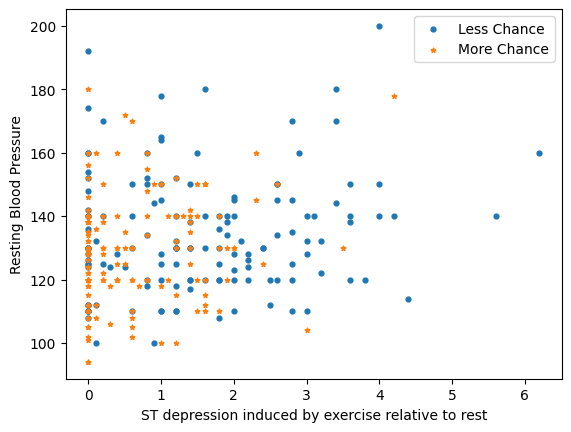

In [12]:
plt.scatter(df_negative.oldpeak , df_negative.trestbps, label="Less Chance" , s = 12, marker='o')
plt.scatter(df_positive.oldpeak , df_positive.trestbps, label="More Chance" , s = 12, marker='*')
plt.xlabel('ST depression induced by exercise relative to rest')
plt.ylabel('Resting Blood Pressure')
plt.legend()
plt.show()

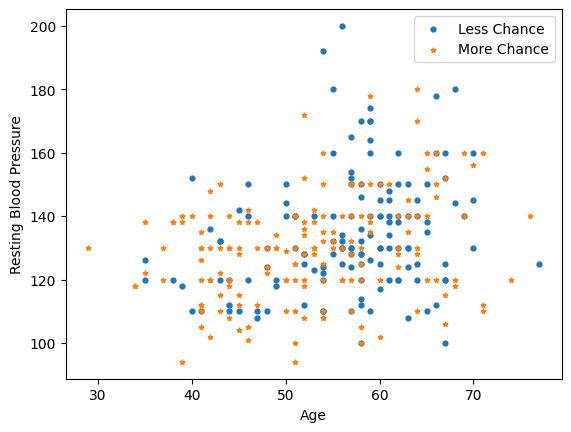

In [13]:
plt.scatter(df_negative.age , df_negative.trestbps, label="Less Chance" , s = 12, marker='o')
plt.scatter(df_positive.age , df_positive.trestbps, label="More Chance" , s = 12, marker='*')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.legend()
plt.show()

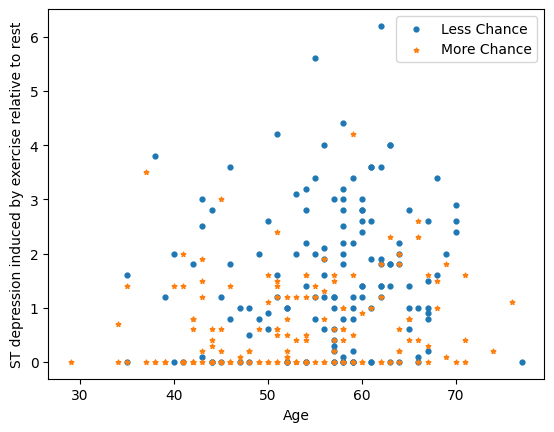

In [14]:
plt.scatter(df_negative.age , df_negative.oldpeak, label="Less Chance" , s = 12, marker='o')
plt.scatter(df_positive.age , df_positive.oldpeak, label="More Chance" , s = 12, marker='*')
plt.xlabel('Age')
plt.ylabel('ST depression induced by exercise relative to rest')
plt.legend()
plt.show()

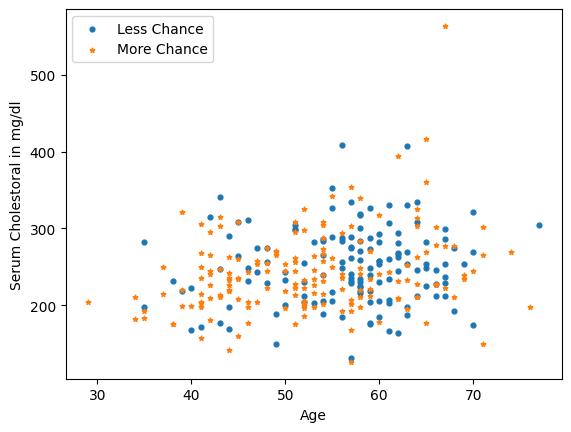

In [15]:
plt.scatter(df_negative.age , df_negative.chol, label="Less Chance" , s = 12, marker='o')
plt.scatter(df_positive.age , df_positive.chol, label="More Chance" , s = 12, marker='*')
plt.xlabel('Age')
plt.ylabel('Serum Cholestoral in mg/dl')
plt.legend()
plt.show()

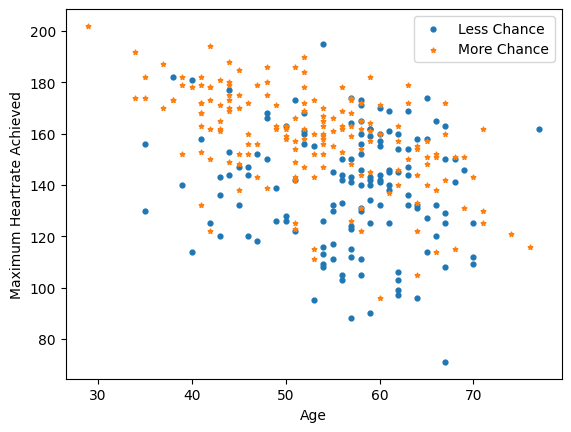

In [16]:
plt.scatter(df_negative.age , df_negative.thalach, label="Less Chance" , s = 12, marker='o')
plt.scatter(df_positive.age , df_positive.thalach, label="More Chance" , s = 12, marker='*')
plt.xlabel('Age')
plt.ylabel('Maximum Heartrate Achieved')
plt.legend()
plt.show()

In [17]:
# 2. Use the created plots to try to find some numerical features that can be used for good classification models
# (similar to the example in class find features that help in linearly separating data)

# The graphs of Age and Maximum Heartrate, Age and Serum Cholestoral, Serum Cholestoral and Maximum Heartrate, and 
# Resting Blood Pressure and Maximum Heartrate have data that is roughly able to be visually dissected into the categories.
# This being said, I would choose Age, Maximum Heartrate, and Serum Cholestoral

In [18]:
# 3. Split the dataset into 70% train and 30% test

In [19]:
df_2 = df[['age', 'thalach', 'chol', 'target']]
X = df_2.drop('target', axis=1)
y = df_2['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [20]:
# 4. Implement the Logistic Regression classification algorithm

In [21]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

In [22]:
# 5. Use the evaluation metrics discussed in the class to see how well your models have performed for the given dataset.

In [23]:
print(accuracy_score(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

0.7472527472527473
[[27  6]
 [17 41]]


In [24]:
# Observation Table: 

# Features: Age, Maximum Heartrate, Serum Cholestoral
# Precision: TP/(TP+FP) = 27/(27+6) = 0.818181...
# Recall: TP/(TP+FN) = 27/(27+17) = 0.6136363...
# Accuracy: (TP+TN)/(TOTAL) = 68/91 = 0.7472527472527473
# F1: 2 * (Precision*Recall)/(Precision+Recall) = 0.701298701299

In [25]:
# Alternative Logistic Regression (#4 and 5 again)
df_3 = df[['age', 'trestbps', 'thalach', 'chol', 'target']]
X = df_3.drop('target', axis=1)
y = df_3['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

print(accuracy_score(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

0.7032967032967034
[[24  7]
 [20 40]]


In [26]:
# Observation Table: 

# Features: Age, Maximum Heartrate, Serum Cholestoral, Resting Blood Pressure
# Precision: TP/(TP+FP) = 24/(24+7) = 0.7741935483
# Recall: TP/(TP+FN) = 24/(24+20) = 0.545454545455
# Accuracy: (TP+TN)/(TOTAL) = 64/91 = 0.7032967032967034
# F1: 2 * (Precision*Recall)/(Precision+Recall) = 0.64